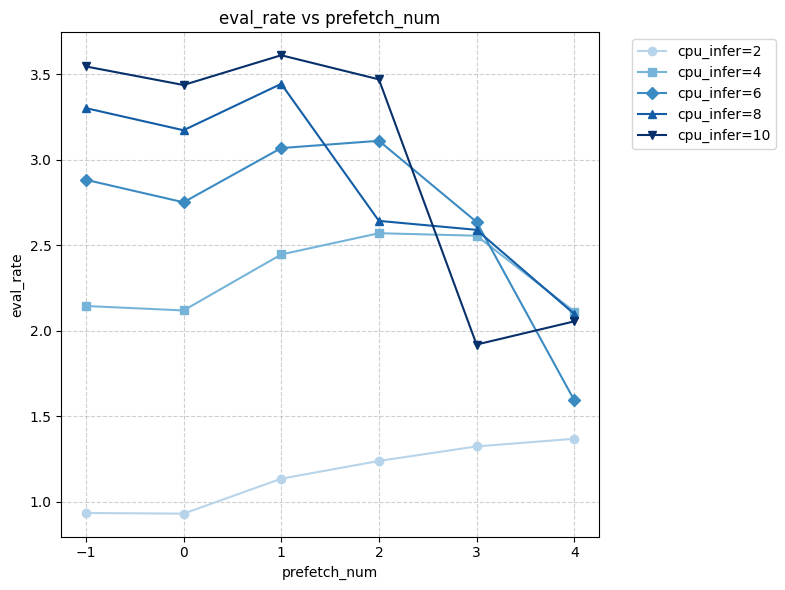

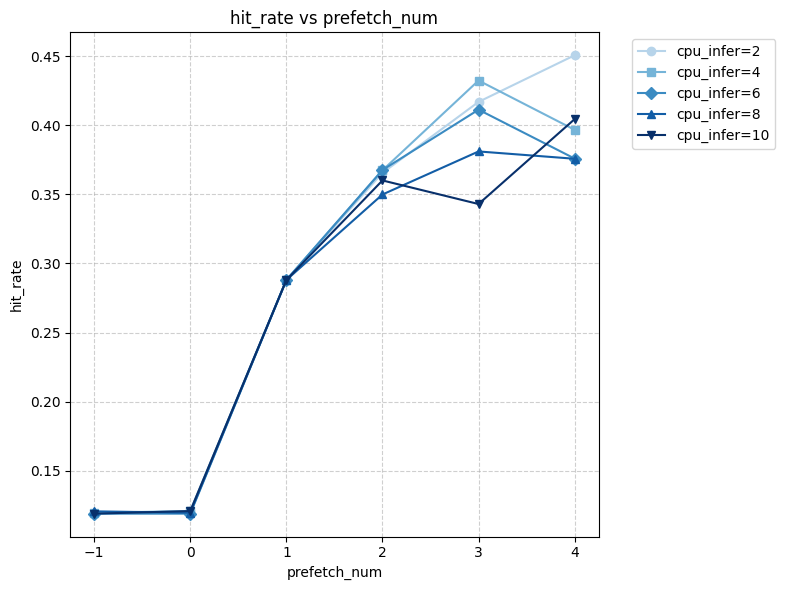

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## 绘制实验结果折线图
# 读取 experiment_results.csv 文件，并绘制两个折线图：
# 1. eval_rate vs prefetch_num
# 2. hit_rate vs prefetch_num
# 横轴为 prefetch_num，
# 不同 cpu_infer 用颜色深浅和点形状区分，legend 放在图外。

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 读取 CSV 文件
csv_file = "./experiment_results.csv"
df = pd.read_csv(csv_file)

# 获取 cpu_infer 的所有取值
cpu_infers = sorted(df["cpu_infer"].unique())

# 定义颜色映射和标记样式
colors = cm.Blues(np.linspace(0.3, 1, len(cpu_infers)))
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "h", "x", "*"]

# 绘制 eval_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["eval_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("eval_rate")
plt.title("eval_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()

# 绘制 hit_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["hit_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("hit_rate")
plt.title("hit_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

layer_results = pd.read_csv("20251009-031029_results_layer_strategy0.csv")
token_results_0 = pd.read_csv("20251008-214435_results_token_strategy0_start0.csv")
token_results_29 = pd.read_csv("20251008-232811_results_token_strategy0_start29.csv")
len(layer_results), len(token_results_0),len(token_results_29)

(180, 180, 180)

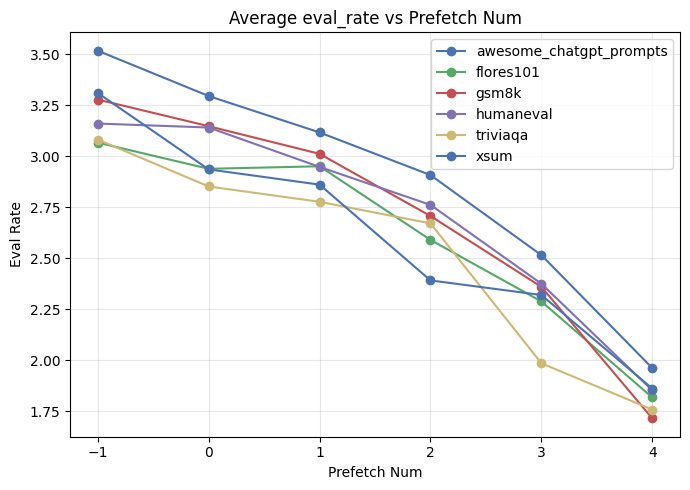

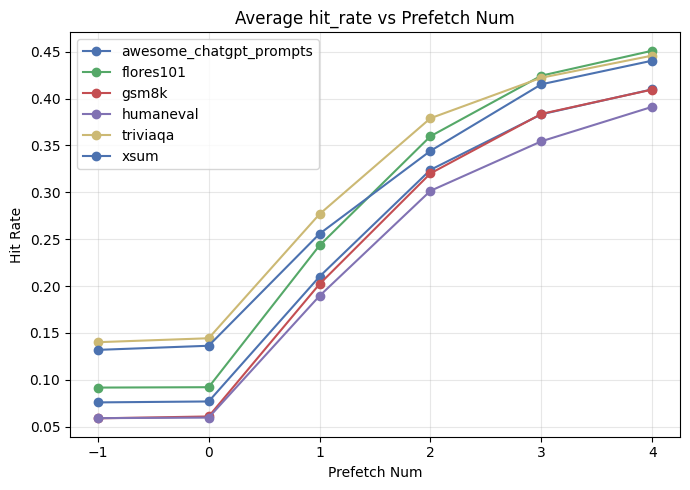

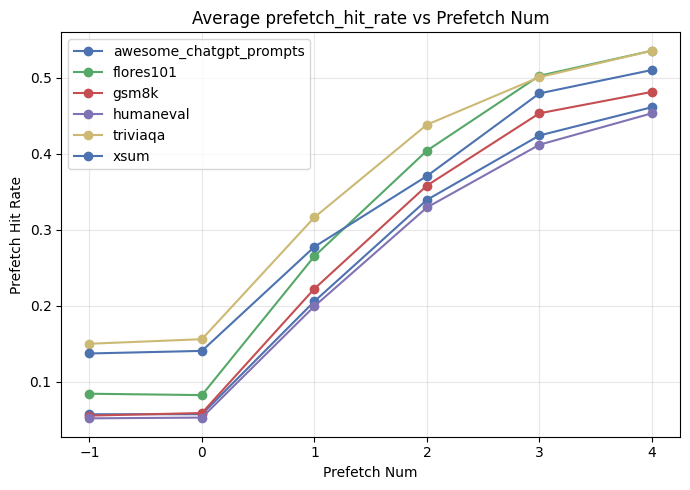

In [4]:
grouped = layer_results.groupby(['dataset_name', 'prefetch_num'])[['eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()

# ===== 3. 绘图 =====
metrics = ['eval_rate', 'hit_rate', 'prefetch_hit_rate']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']  # 柔和配色

for metric in metrics:
    plt.figure(figsize=(7, 5))
    for i, (dataset, group) in enumerate(grouped.groupby('dataset_name')):
        plt.plot(group['prefetch_num'], group[metric], marker='o', label=dataset, color=colors[i % len(colors)])
    
    plt.title(f"Average {metric} vs Prefetch Num")
    plt.xlabel("Prefetch Num")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

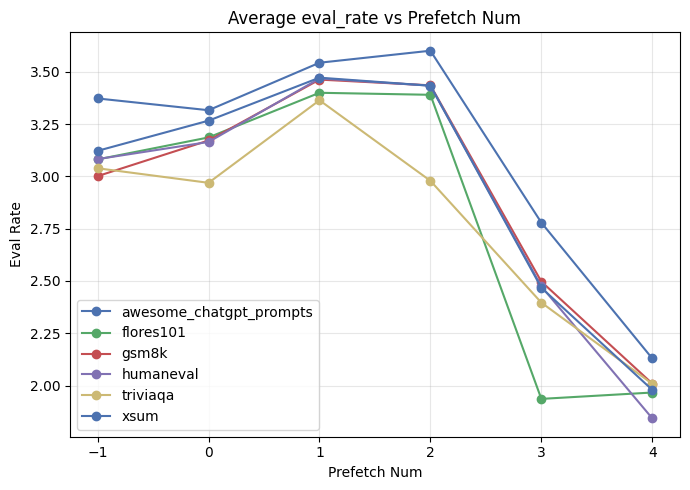

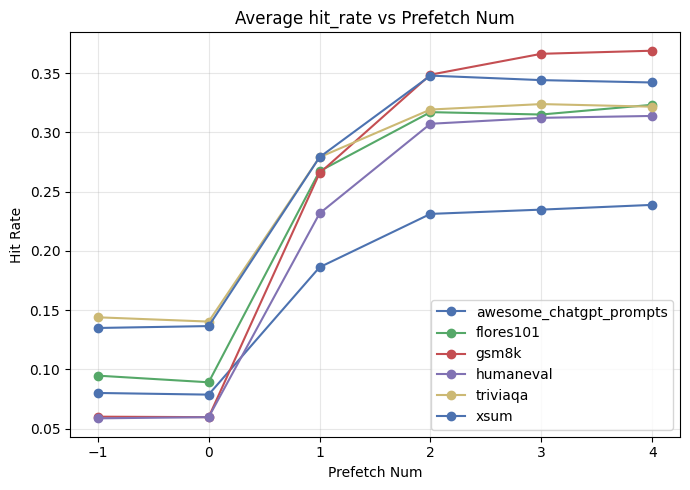

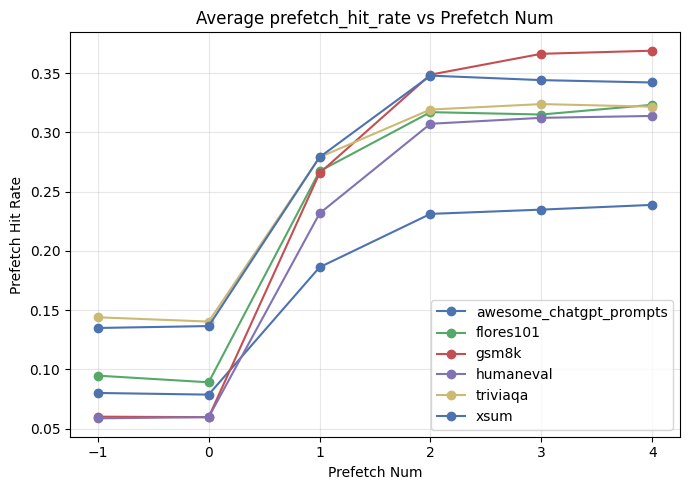

In [5]:
grouped = token_results_0.groupby(['dataset_name', 'prefetch_num'])[['eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()

# ===== 3. 绘图 =====
metrics = ['eval_rate', 'hit_rate', 'prefetch_hit_rate']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']  # 柔和配色

for metric in metrics:
    plt.figure(figsize=(7, 5))
    for i, (dataset, group) in enumerate(grouped.groupby('dataset_name')):
        plt.plot(group['prefetch_num'], group[metric], marker='o', label=dataset, color=colors[i % len(colors)])
    
    plt.title(f"Average {metric} vs Prefetch Num")
    plt.xlabel("Prefetch Num")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

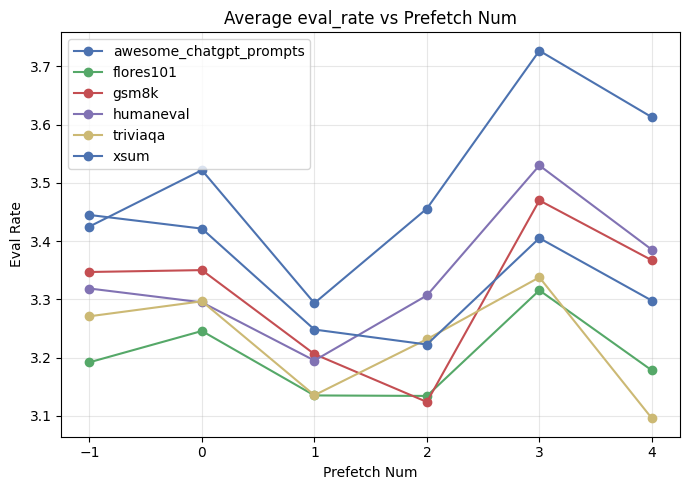

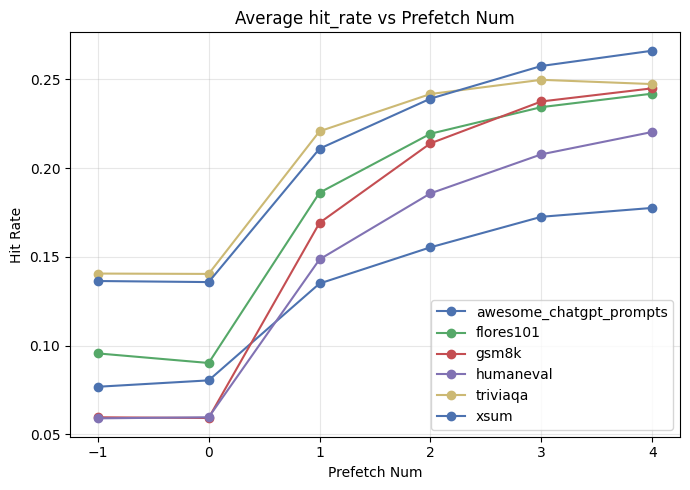

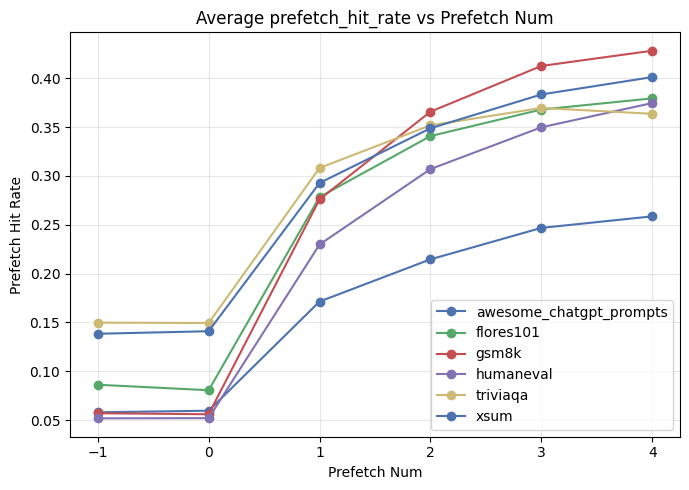

In [6]:
grouped = token_results_29.groupby(['dataset_name', 'prefetch_num'])[['eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()

# ===== 3. 绘图 =====
metrics = ['eval_rate', 'hit_rate', 'prefetch_hit_rate']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']  # 柔和配色

for metric in metrics:
    plt.figure(figsize=(7, 5))
    for i, (dataset, group) in enumerate(grouped.groupby('dataset_name')):
        plt.plot(group['prefetch_num'], group[metric], marker='o', label=dataset, color=colors[i % len(colors)])
    
    plt.title(f"Average {metric} vs Prefetch Num")
    plt.xlabel("Prefetch Num")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()